# Polynomial Regression Example

## Importing the data

In [1]:
import pandas as pd
import numpy

In [2]:
syntheticdf_1 = pd.read_csv('data/synthetic-1.csv')
syntheticdf_2 = pd.read_csv('data/synthetic-2.csv')
syntheticdf_3 = pd.read_csv('data/synthetic-3.csv')

In [3]:
df_list = [syntheticdf_1, syntheticdf_2, syntheticdf_3]

for df in df_list:
    df.columns = ['x', 'y']

df_list[0]

,x,y
0,0.185335,3.203305
1,1.066434,4.340509
2,-1.980521,11.238557
3,-1.267863,5.441072
4,-1.228651,5.250218
...,...,...
94,1.031286,3.139627
95,0.852284,0.643492
96,-1.486425,5.207026
97,-1.424195,3.382489


# Plot the Dataframes

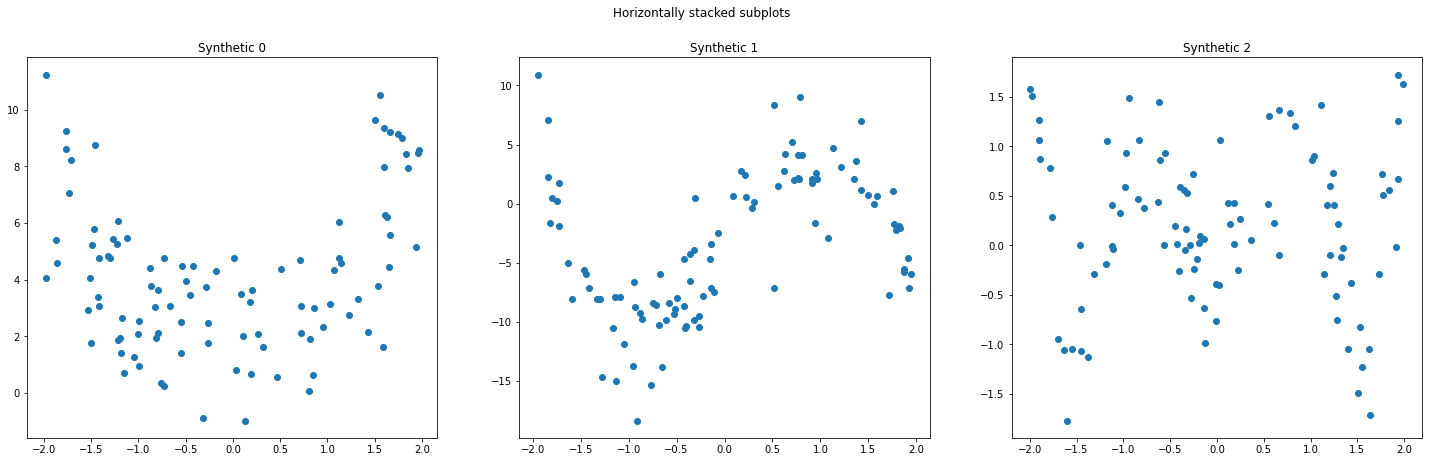

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize = (25,7))
fig.suptitle('Horizontally stacked subplots')
for index, ax in enumerate(axs):
    ax.set_title('Synthetic ' + str(index))  
    ax.scatter(df_list[index]['x'],df_list[index]['y'])

# Testing Polynomial Class

In [5]:
import poly_reg as pr
import numpy as np

#Make a Polynomial

poly = np.poly1d([1,0,0])

print(poly)


   2
1 x


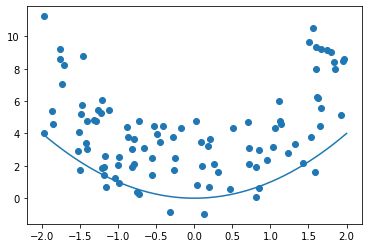

In [6]:
x_data = syntheticdf_1['x']
y_data = syntheticdf_1['y']

x = np.linspace(-2,2)
y = poly(x)

plt.plot(x,y)
plt.scatter(x_data,y_data)

# More Testing

In [7]:
pr.MSE(x_data,y_data,poly)

11.56765499411301

In [8]:
twos = np.array([2,2,2,2])

Epoch[0] : MSE = 17.37516557609045
Epoch[100] : MSE = 15.533123464468872
Epoch[200] : MSE = 13.981609793611533
Epoch[300] : MSE = 12.733868915301684
Epoch[400] : MSE = 11.71954338466838
Epoch[500] : MSE = 10.895376655239142
Epoch[600] : MSE = 10.203431704387894
Epoch[700] : MSE = 9.638117081418741
Epoch[800] : MSE = 9.165939604541702
Epoch[900] : MSE = 8.778118827768349


' \n0.3431 x + 2.99'

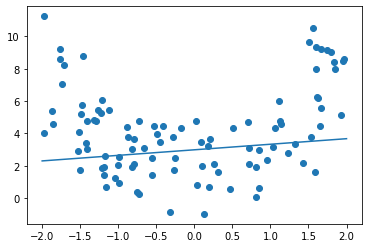

In [33]:
# How about a different polynomial

poly = np.poly1d([2,0,2])

pr.MSE(x_data,y_data,poly)

pr.MSEderiv(x_data,y_data,poly,1)

poly = pr.poly_reg(x_data,y_data, 1 , 0.001, 1000, 20)

x = np.linspace(-2,2)
y = poly(x)

plt.plot(x,y)
plt.scatter(x_data,y_data)


# Training

In [10]:
polynomial_orders = [1, 2, 4, 7]
polynomials = []
# Lets loop and regress all polinomials needed for this assignment

for df in df_list:
    X = df['x']
    Y = df['y']

    p_list = []
    
    for order in polynomial_orders:
        p_list.append( pr.poly_reg(X,Y, order , 0.001, 1200, 40) )

    polynomials.append(p_list)

Epoch[0] : MSE = 19.527612153423416
Epoch[100] : MSE = 17.293852109500943
Epoch[200] : MSE = 15.438188635932452
Epoch[300] : MSE = 13.932491668880946
Epoch[400] : MSE = 12.688528658520331
Epoch[500] : MSE = 11.66933410588174
Epoch[600] : MSE = 10.83300188596192
Epoch[700] : MSE = 10.16034290422389
Epoch[800] : MSE = 9.606633995695754
Epoch[900] : MSE = 9.128141708013336
Epoch[1000] : MSE = 8.770760077618474
Epoch[1100] : MSE = 8.4567228665873
Epoch[0] : MSE = 14.011075415654316
Epoch[100] : MSE = 8.38819218583465
Epoch[200] : MSE = 5.837161161418187
Epoch[300] : MSE = 4.7060909664971495
Epoch[400] : MSE = 4.230677832484749
Epoch[500] : MSE = 4.009234649885903
Epoch[600] : MSE = 3.8954431073106983
Epoch[700] : MSE = 3.8382652167594786
Epoch[800] : MSE = 3.8179571383998105
Epoch[900] : MSE = 3.7995041457841836
Epoch[1000] : MSE = 3.7892631780186607
Epoch[1100] : MSE = 3.7799267403014567
Epoch[0] : MSE = 7.808709707186506
Epoch[100] : MSE = 6.107324460492951
Epoch[200] : MSE = 5.635925488

In [11]:
polynomials

[[poly1d([0.26574545, 3.10683727]),
  poly1d([1.6245842 , 0.34111958, 1.710827  ]),
  poly1d([ 0.17970989, -0.00877631,  1.32813664,  0.28259307,  1.11478578]),
  poly1d([ 0.01929624, -0.14987589, -0.0795688 ,  0.72490345,  0.10377079,
          1.07631225,  0.29082281,  1.23066973])],
 [poly1d([ 1.68397926, -2.36616302]),
  poly1d([-0.5096874 ,  1.8072618 , -1.91386179]),
  poly1d([ 0.25522722, -0.74837028, -0.77514648,  2.42443331, -2.17884903]),
  poly1d([-0.4653299 ,  0.23817915,  0.90237881, -0.33510793,  1.22458387,
         -0.87430522,  2.12235241, -2.23979302])],
 [poly1d([0.01971949, 0.42201505]),
  poly1d([-0.11957256,  0.08934364,  0.46467782]),
  poly1d([ 0.05124298, -0.04814907, -0.10866401,  0.1101797 ,  0.16404687]),
  poly1d([ 0.04229787,  0.04747984, -0.26989526, -0.05906447,  0.32848431,
         -0.31671805,  0.07564299,  0.34693139])]]

# Graphing the Polynomials

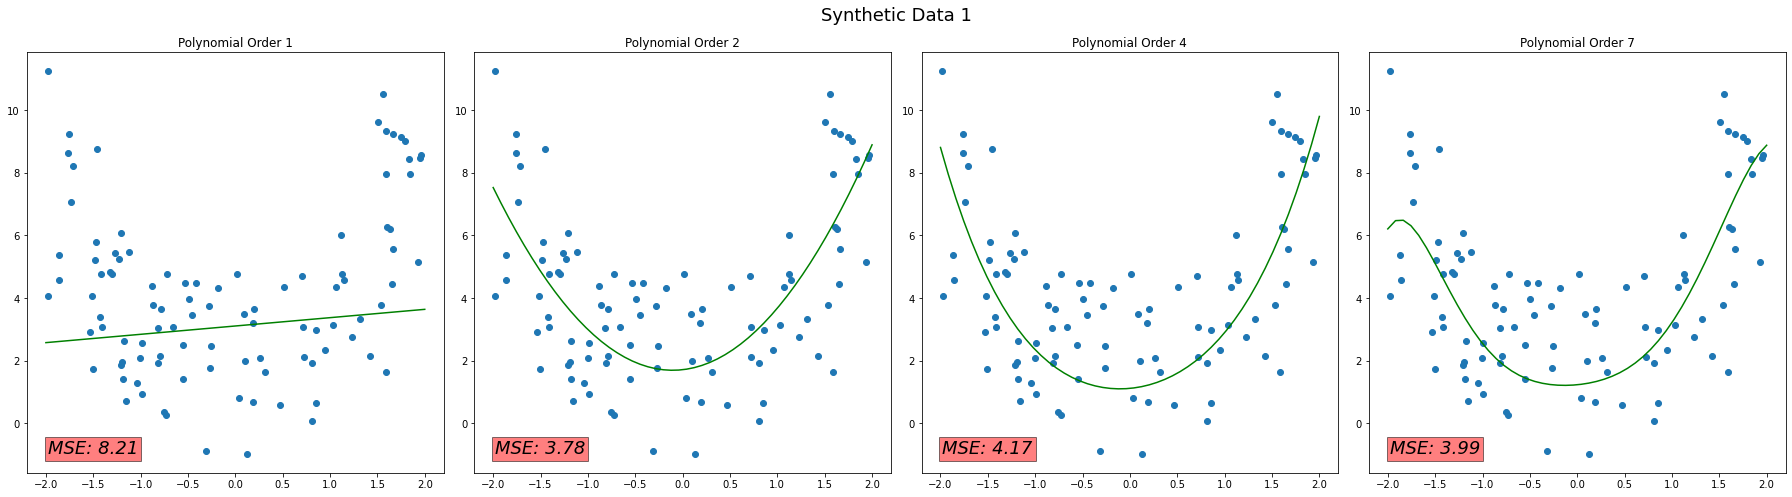

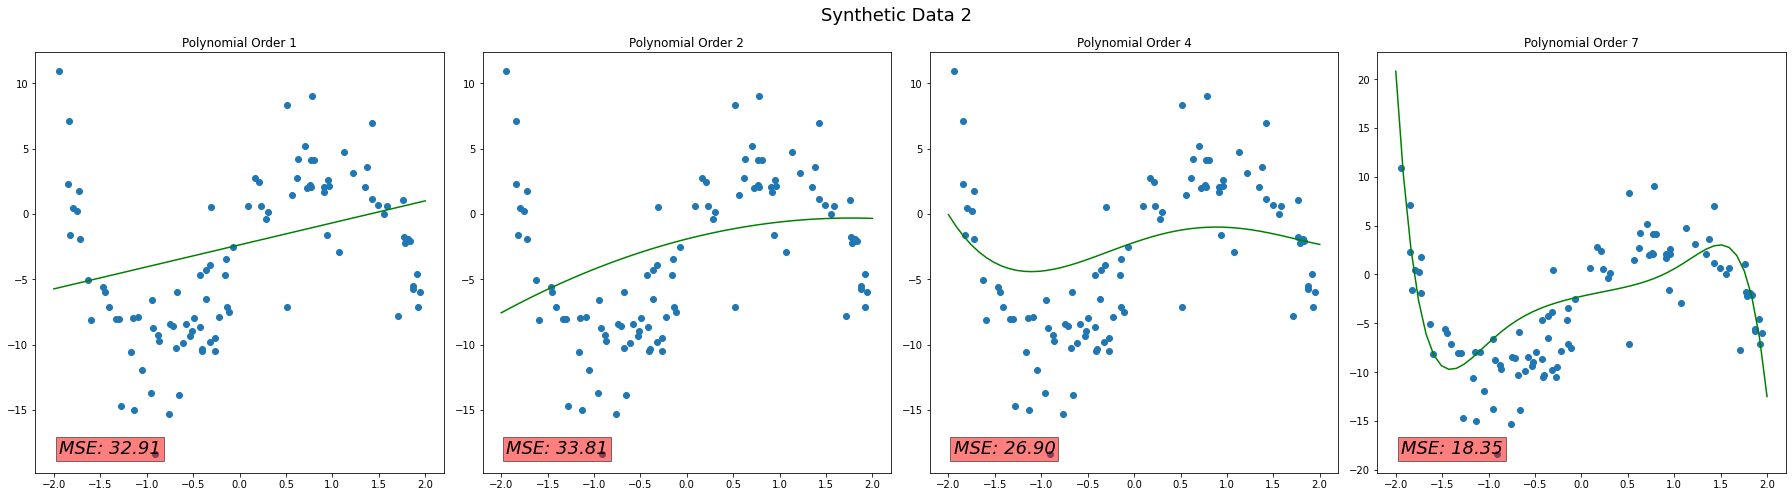

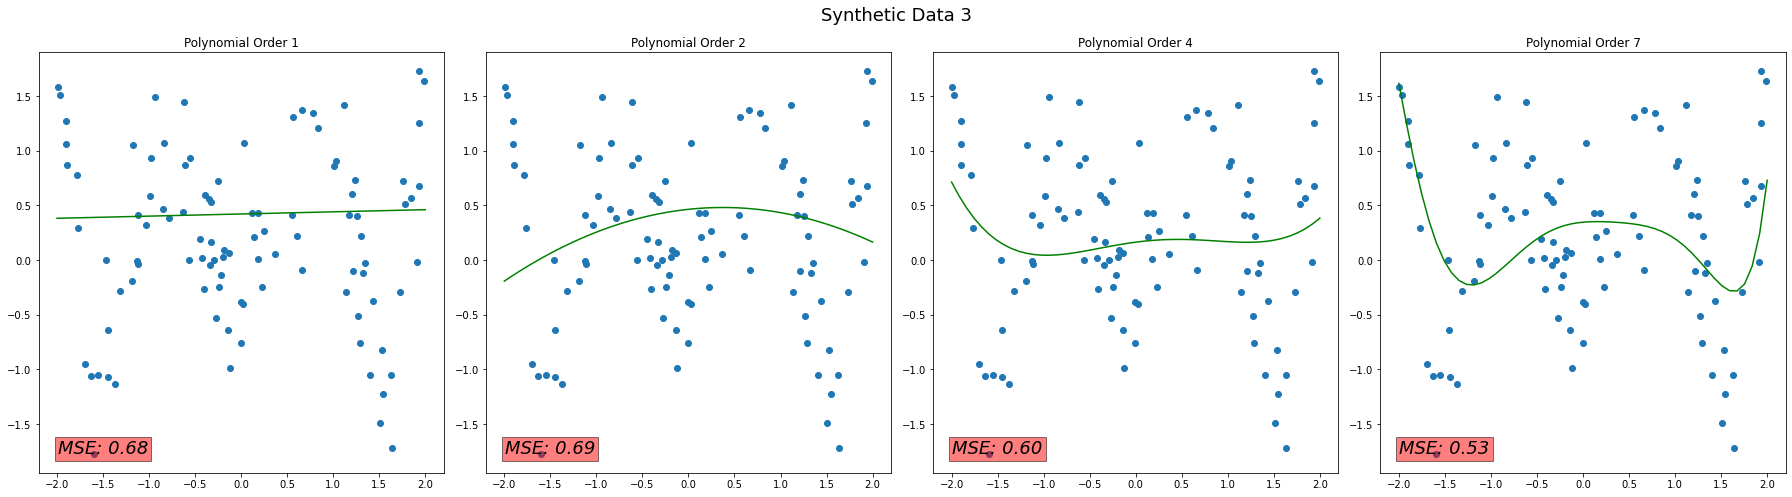

In [51]:
for df_i,df in enumerate(df_list):
    fig, axs = plt.subplots(1, 4, figsize = (25,7))
    fig.suptitle(f'Synthetic Data {df_i + 1}', fontsize = 18)

    for index, ax in enumerate(axs):
        ax.set_title(f'Polynomial Order {polynomial_orders[index]}') 
        X,Y = df['x'],df['y']
        ax.scatter(X,Y)
        poly = polynomials[df_i][index]
        #print(str(poly))
        ax.text(min(X), min(Y), f'MSE: {pr.MSE(X,Y, poly):0.2f}', style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 3}, fontsize = 18)

        #ax.text(-1.75, max(Y), f'{str(poly)}', bbox={'facecolor': 'green', 'alpha': 0.3, 'pad': 2}, fontsize = 8)

        x = np.linspace(-2,2)
        y = poly(x)

        ax.plot(x,y, c ='g')

    plt.tight_layout()

plt.show()